## LASSO REGRESSION
* Prevent overfitting
* Uses regularisation
* Uses a penalty parameter lambda to change unimportant features (their regression coefficients) into 0. When lambda = 0, then it is a normal OLS regression. (Note sklearn name it as alpha instead)
  * Bias increase & variability decreases when lambda increases
  * Useful when there are many features (explanatory variables)
  * Have to standardize all features so that they have mean 0 and std error 1
  * Have several algorithms: LAR (Least Angle Regression). Starts w 0 predictors & add each predictor that is most correlated at each step

#### LIIMTATIONS
  * Selection of variables are statistically driven; some variables should logically be included
  * If variables are correlated, lasso arbituary selects one

#### VIDEOS
  * https://www.youtube.com/watch?v=l9V5tlIWTvs
  * https://www.youtube.com/watch?v=qU1_cj4LfLY

In [40]:
import pandas as pd
import numpy as py
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLarsCV
from sklearn.cross_validation import train_test_split
import sklearn.metrics

In [21]:
boston = load_boston()
# the boston dataset consists of two arrays: features (.data) & target (.target)
# lets add the feature into a dataframe
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [7]:
print boston['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
# Add housing price (target) in
df['PRICE']=pd.DataFrame(boston.target)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [34]:
# standardise the means to 0 and standard error to 1
from sklearn import preprocessing
for i in df.columns[:-1]: # df.columns[:-1] = dataframe for all features
    df[i] = preprocessing.scale(df[i].astype('float64'))

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-1.075117e-17,2.988387e-16,1.624195e-16,-2.959863e-16,-2.817246e-16,2.632940e-17,1.985676e-17,1.579764e-16,1.565283e-15,2.213864e-15,8.302537e-16,5.512718e-16,3.269234e-17,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.177134e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.088961e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.885818e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,6.248255e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.941735e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


In [39]:
feature = df[df.columns[:-1]]
target = df['PRICE']

train_feature, test_feature, train_target, test_target = \
train_test_split(feature, target, random_state=123, test_size=0.2)

print train_feature.shape
print test_feature.shape

(404, 13)
(102, 13)


### FIT THE MODEL

In [45]:
# Fit the LASSO LAR regression model
# cv=10; use k-fold cross validation
# precompute; True=model will be faster if dataset is large
model=LassoLarsCV(cv=10, precompute=False).fit(train_feature,train_target)
model

LassoLarsCV(copy_X=True, cv=10, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute=False, verbose=False)

### ANALYSE THE RESULTS

#### Compare the regression coefficients, and see which one LASSO removed

In [158]:
# print regression coefficients and sort them
df2=pd.DataFrame(model.coef_, index=feature.columns)
df2.sort_values(by=0,ascending=False)

# alternatively, can do this:
# dict creates dictionary; zip creates list
# coeff=dict(zip(feature.columns, model.coef_))

# LSTAT is the most important predictor, followed by RM, DIS, and RAD

,0
RM,3.050843
RAD,2.040252
ZN,1.004318
B,0.629933
CHAS,0.317948
INDUS,0.225688
AGE,0.000000
CRIM,-0.770291
NOX,-1.617137
TAX,-1.731576


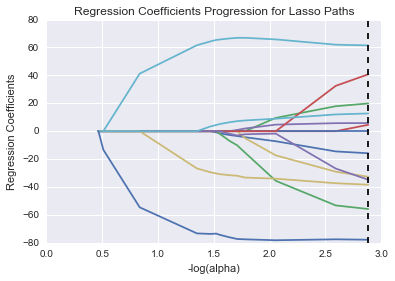

In [180]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

# visualise how much each regression coefficient change to 0 when alpha is increased
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
# Transposing coefficient path
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# first coefficient that is placed is the most important

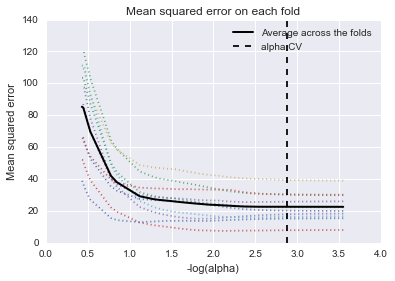

In [181]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()

# path of mean square error when alpha increases
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

# removing more predictors does not always lead to reduction of mean square error

In [53]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(train_target, model.predict(train_feature))
test_error = mean_squared_error(test_target, model.predict(test_feature))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# MSE closer to 0 are better
# test dataset is less accurate as expected

training data MSE
20.7279948891
test data MSE
28.3767672242


In [54]:
# R-square from training and test data
rsquared_train=model.score(train_feature,train_target)
rsquared_test=model.score(test_feature,test_target)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

# test data explained 65% of the predictors

training data R-square
0.755337444405
test data R-square
0.657019301268
